In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

In [2]:
file_path = 'C:/Users/7kingdom/Documents/인공지능개론/src/car+evaluation/car.data'

column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]          

df = pd.read_csv(file_path, header=None, names=column_names)

df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# 결측치 확인
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
label=LabelEncoder()

df['buying']=label.fit_transform(df['buying'])
df['maint']=label.fit_transform(df['maint'])
df['doors']=label.fit_transform(df['doors'])
df['persons']=label.fit_transform(df['persons'])
df['lug_boot']=label.fit_transform(df['lug_boot'])
df['safety']=label.fit_transform(df['safety'])
df['class']=label.fit_transform(df['class'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [5]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

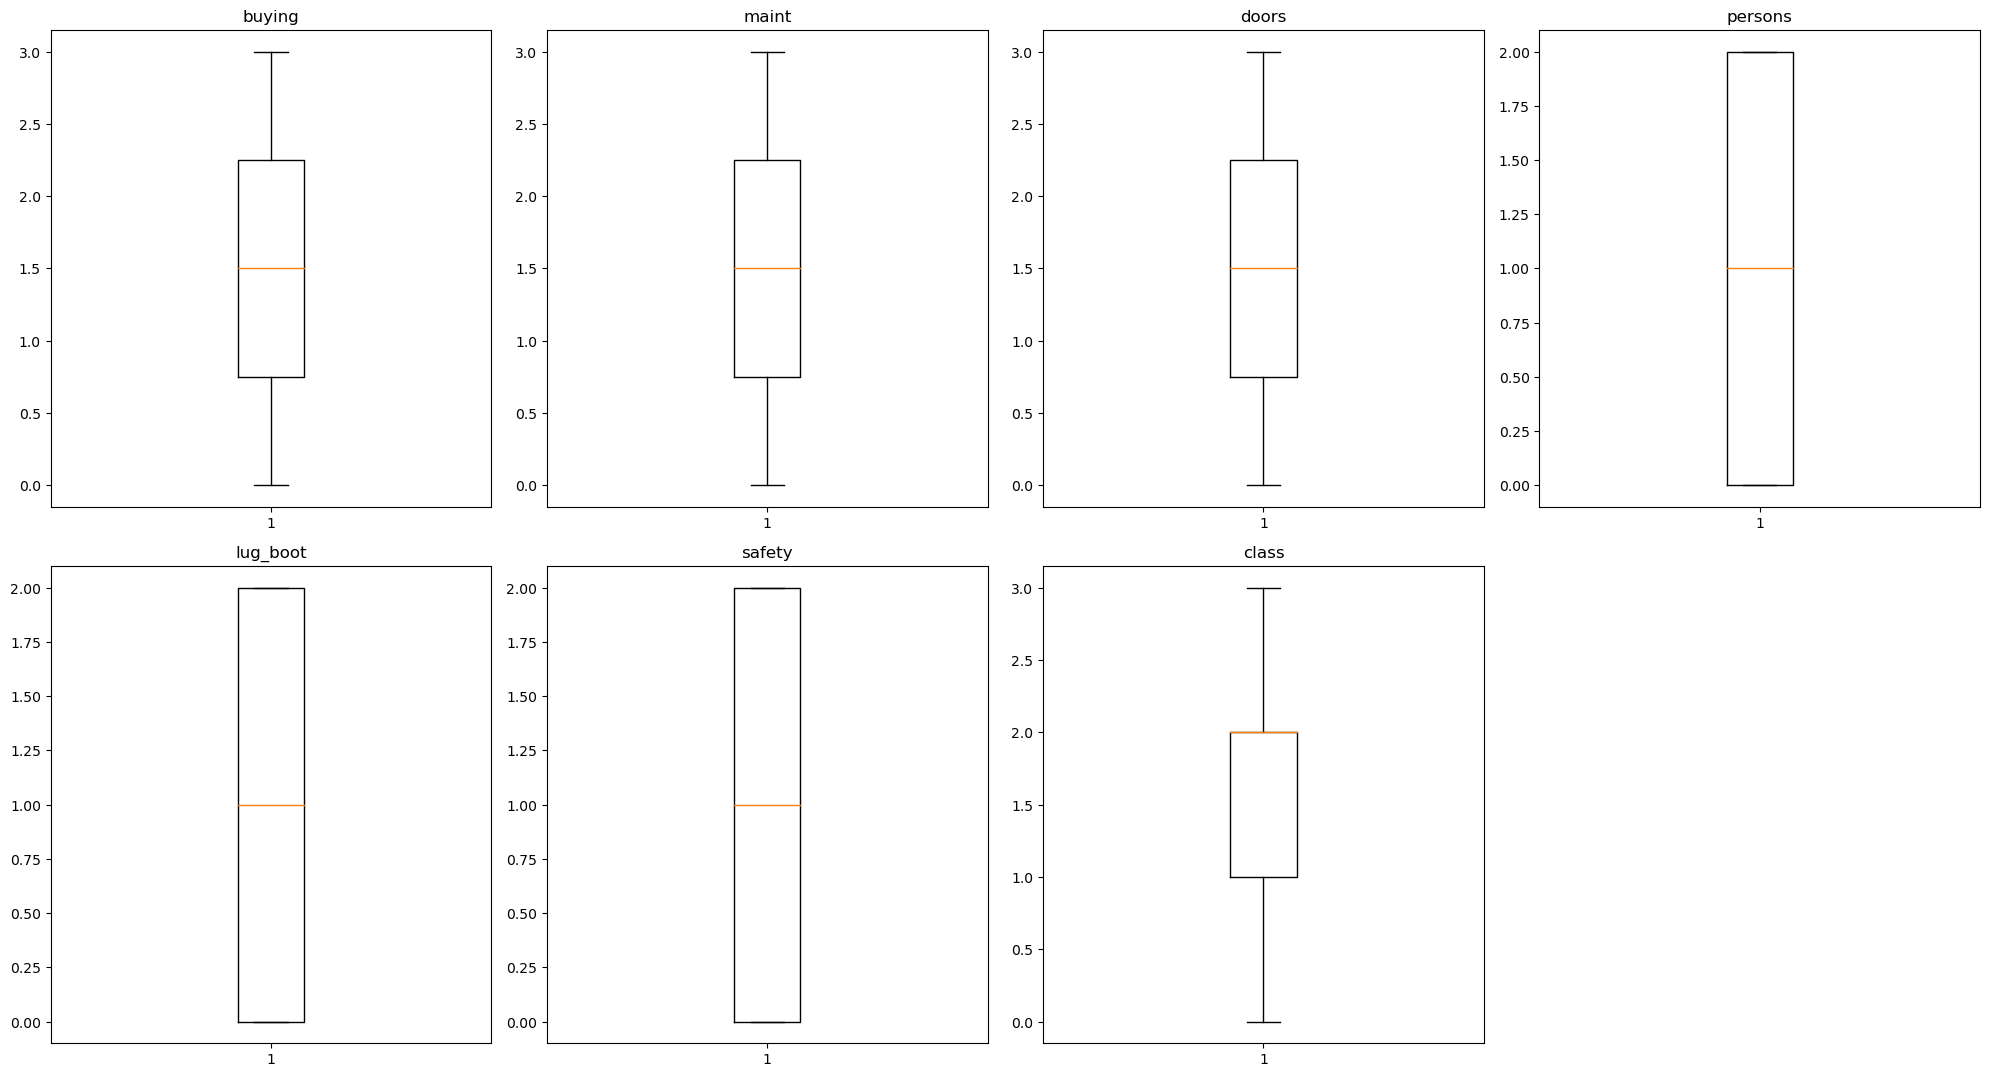

In [6]:
# 박스 플롯 그리기
plt.figure(figsize=(20, 16))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

Text(0.5, 1.0, 'Label')

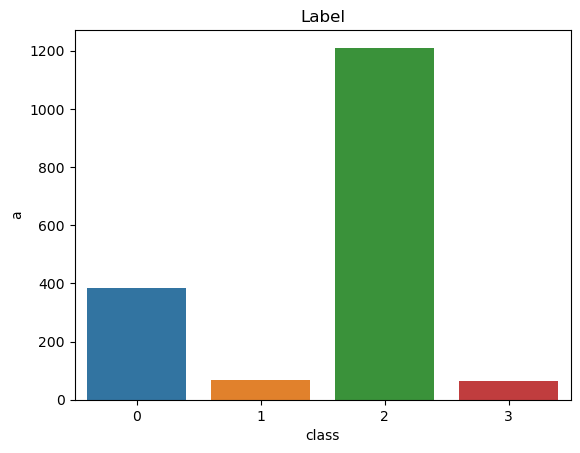

In [8]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.ylabel("a")
plt.title("Label")

In [9]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

2    1210
0     384
1      69
3      65
Name: class, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
label=LabelEncoder()

df['buying']=label.fit_transform(df['buying'])
df['maint']=label.fit_transform(df['maint'])
df['doors']=label.fit_transform(df['doors'])
df['persons']=label.fit_transform(df['persons'])
df['lug_boot']=label.fit_transform(df['lug_boot'])
df['safety']=label.fit_transform(df['safety'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 정규화(Min-Max Scaling)
scaler = MinMaxScaler()
scaled_data_minmax = scaler.fit_transform(df.drop('class', axis=1))  # Outcome 열 제외하고 정규화
scaled_df_minmax = pd.DataFrame(scaled_data_minmax, columns=df.columns[:-1])  # 데이터프레임으로 변환

scaled_df_minmax

,buying,maint,doors,persons,lug_boot,safety
0,1.000000,1.000000,0.0,0.0,1.0,0.5
1,1.000000,1.000000,0.0,0.0,1.0,1.0
2,1.000000,1.000000,0.0,0.0,1.0,0.0
3,1.000000,1.000000,0.0,0.0,0.5,0.5
4,1.000000,1.000000,0.0,0.0,0.5,1.0
...,...,...,...,...,...,...
1723,0.333333,0.333333,1.0,1.0,0.5,1.0
1724,0.333333,0.333333,1.0,1.0,0.5,0.0
1725,0.333333,0.333333,1.0,1.0,0.0,0.5
1726,0.333333,0.333333,1.0,1.0,0.0,1.0


In [12]:
X=scaled_df_minmax

X = X.values

X

array([[1.        , 1.        , 0.        , 0.        , 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , 0.        , 1.        ,
        0.        ],
       ...,
       [0.33333333, 0.33333333, 1.        , 1.        , 0.        ,
        0.5       ],
       [0.33333333, 0.33333333, 1.        , 1.        , 0.        ,
        1.        ],
       [0.33333333, 0.33333333, 1.        , 1.        , 0.        ,
        0.        ]])

In [13]:
Y=df['class']
y = pd.get_dummies(Y).values

y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

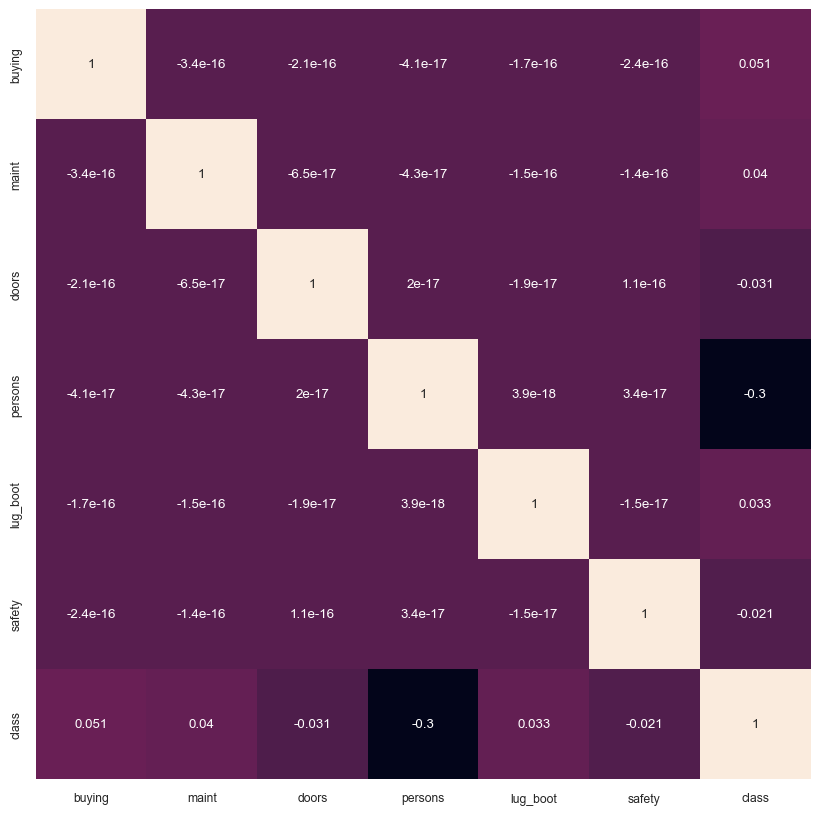

In [14]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1296, 6) (432, 6) (1296, 4) (432, 4)


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(6,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 6)                 0         
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 2,660
Trainable params: 2,660
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
41/41 [==============================] - 1s 8ms/step - loss: 1.1622 - accuracy: 0.6590 - val_loss: 0.9579 - val_accuracy: 0.6852
Epoch 2/30
41/41 [==============================] - 0s 4ms/step - loss: 0.8153 - accuracy: 0.7076 - val_loss: 0.7852 - val_accuracy: 0.6852
Epoch 3/30
41/41 [==============================] - 0s 3ms/step - loss: 0.7247 - accuracy: 0.7137 - val_loss: 0.7461 - val_accuracy: 0.6782
Epoch 4/30
41/41 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.7199 - val_loss: 0.7201 - val_accuracy: 0.6875
Epoch 5/30
41/41 [==============================] - 0s 3ms/step - loss: 0.6646 - accuracy: 0.7292 - val_loss: 0.6894 - val_accuracy: 0.6921
Epoch 6/30
41/41 [==============================] - 0s 4ms/step - loss: 0.6352 - accuracy: 0.7384 - val_loss: 0.6661 - val_accuracy: 0.6875
Epoch 7/30
41/41 [==============================] - 0s 3ms/step - loss: 0.6117 - accuracy: 0.7407 - val_loss: 0.6544 - val_accuracy: 0.7106
Epoch 8/30
41/41 [==

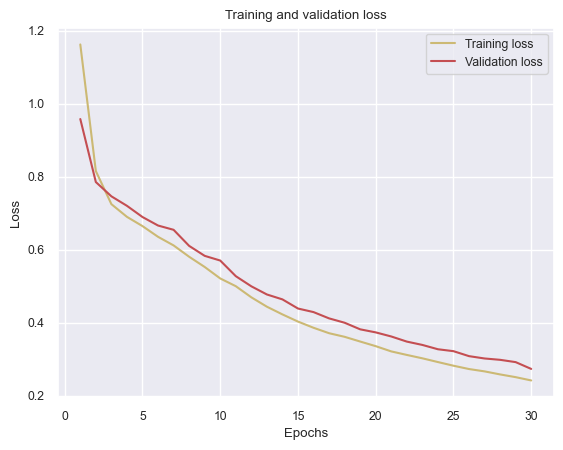

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.69      0.95      0.80        99
           1       0.00      0.00      0.00        21
           2       0.99      0.96      0.97       296
           3       0.88      0.44      0.58        16

    accuracy                           0.89       432
   macro avg       0.64      0.59      0.59       432
weighted avg       0.87      0.89      0.87       432

[[ 94   0   4   1]
 [ 21   0   0   0]
 [ 12   0 284   0]
 [  9   0   0   7]]


C:\Users\7kingdom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\7kingdom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\7kingdom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
